## Sales Analysis

This notebook contains analysis on sales data. Answering the following questions:
1. What was the best month for sales? How much was earned that month?
2. Which city had the highest number of sales?
3. What time should advertisments be displayed ot maximize sales?
4. What products are often sold together?
5. Which product sold the most?

In [200]:
# import libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### Merge the 12 months of sales data into a single df

In [150]:
# merge data files into one
files = [file for file in os.listdir('./Sales_Data')] # Create a list of all file names in Sales_Data folder
print(files)

all_data = pd.DataFrame() # Create empty df

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_data = pd.concat([all_data, df]) #Append all dfs to all_data


#all_data.to_csv('all_data_test.csv', index=False) #Export to CSV

all_data.head()

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Examine and Clean Data

In [153]:
rows, columns = all_data.shape
print("Rows:", rows, "Columns:", columns)

Rows: 186850 Columns: 6


In [155]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [157]:
all_data.isnull().sum()
# 545 missing values

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [159]:
 print(all_data[all_data['Order ID'].isnull()])

      Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1          NaN     NaN              NaN        NaN        NaN              NaN
356        NaN     NaN              NaN        NaN        NaN              NaN
735        NaN     NaN              NaN        NaN        NaN              NaN
1433       NaN     NaN              NaN        NaN        NaN              NaN
1553       NaN     NaN              NaN        NaN        NaN              NaN
...        ...     ...              ...        ...        ...              ...
10012      NaN     NaN              NaN        NaN        NaN              NaN
10274      NaN     NaN              NaN        NaN        NaN              NaN
10878      NaN     NaN              NaN        NaN        NaN              NaN
11384      NaN     NaN              NaN        NaN        NaN              NaN
11662      NaN     NaN              NaN        NaN        NaN              NaN

[545 rows x 6 columns]


In [167]:
# Delete rows missing all values
all_data2 = all_data.dropna(how='all').copy()

In [169]:
all_data2.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [171]:
all_data2.shape #545 rows dropped, no more missing values

(186305, 6)

In [175]:
#Check values
print(all_data2['Quantity Ordered'].value_counts())
print(all_data2[all_data2['Quantity Ordered'] == 'Quantity Ordered'])

Quantity Ordered
1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: count, dtype: int64
       Order ID  Product  Quantity Ordered  Price Each  Order Date  \
519    Order ID  Product  Quantity Ordered  Price Each  Order Date   
1149   Order ID  Product  Quantity Ordered  Price Each  Order Date   
1155   Order ID  Product  Quantity Ordered  Price Each  Order Date   
2878   Order ID  Product  Quantity Ordered  Price Each  Order Date   
2893   Order ID  Product  Quantity Ordered  Price Each  Order Date   
...         ...      ...               ...         ...         ...   
10000  Order ID  Product  Quantity Ordered  Price Each  Order Date   
10387  Order ID  Product  Quantity Ordered  Price Each  Order Date   
11399  Order ID  Product  Quantity Ordered  Price Each  O

In [177]:
# Remove rows with string values
all_data2 = all_data2[all_data2['Quantity Ordered'] != 'Quantity Ordered']

#Check values
print(all_data2['Quantity Ordered'].value_counts())


Quantity Ordered
1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: count, dtype: int64


### Question 1: What was the best month for sales? How much was earned that month?

In [179]:
# Convert Order Data to a datetime type variable
all_data2['Order Date'] = pd.to_datetime(
    all_data2['Order Date'],
    format='%m/%d/%y %H:%M',
    errors='coerce'
)

all_data2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [185]:
# Extract Month from Order Date and create a new column
all_data2['Month'] = all_data2['Order Date'].dt.month

all_data2.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [193]:
#Convert variable to integer or floats
all_data2['Price Each'] = all_data2['Price Each'].astype(float)
all_data2['Quantity Ordered'] = all_data2['Quantity Ordered'].astype(int)
all_data2['Order ID'] = all_data2['Order ID'].astype(int)

all_data2.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
dtype: object

In [244]:
# Create a new column total sales
all_data2['Total Sales'] = all_data2['Quantity Ordered'] * all_data2['Price Each']
all_data2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [236]:
#Examine sales by month
all_data2.groupby('Month')['Total Sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total Sales, dtype: float64

The month with the most sales is December, a total of $4,613,443.34 was earned.

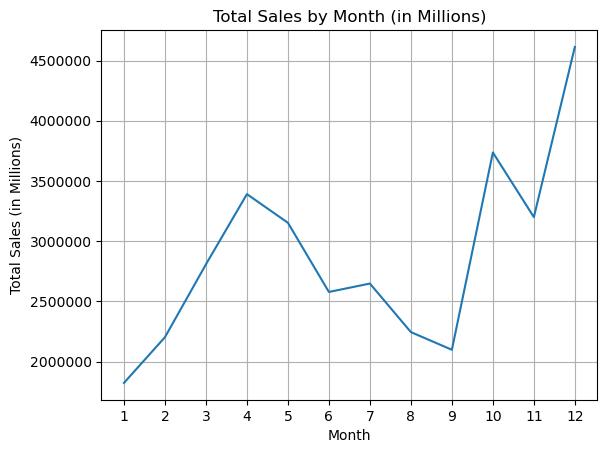

In [240]:
# Graph sales in a line chart
monthly_sales = all_data2.groupby('Month')['Total Sales'].sum()
monthly_sales.head(12)

plt.plot(monthly_sales.index, monthly_sales.values)
plt.xticks(ticks=monthly_sales.index)
plt.ticklabel_format(axis='y', style='plain')
plt.title('Total Sales by Month (in Millions)')
plt.xlabel('Month')
plt.ylabel('Total Sales (in Millions)')
plt.grid(True)
plt.show()

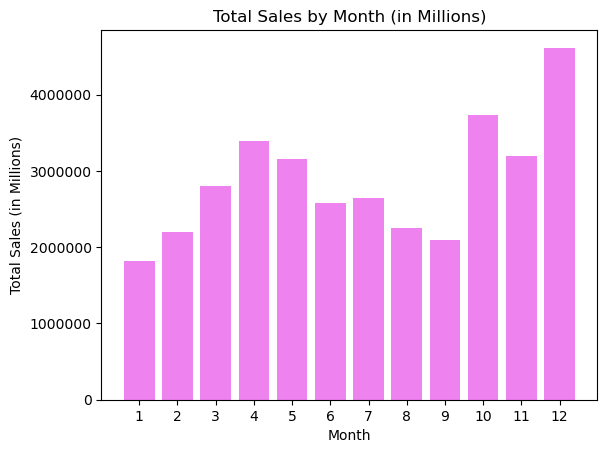

In [242]:
plt.bar(monthly_sales.index, monthly_sales.values, color='violet')
plt.xticks(monthly_sales.index)
plt.ticklabel_format(axis='y', style='plain')
plt.title('Total Sales by Month (in Millions)')
plt.xlabel('Month')
plt.ylabel('Total Sales (in Millions)')
plt.show()

### Question 2: What city had the highest number of sales?

In [299]:
# Create city column
# Use lambda to extract the city and state from the purchase address
all_data2['City'] = all_data2['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
all_data2['State'] = all_data2['Purchase Address'].apply(lambda x: x.split(',')[2][0:3].strip())

all_data2['City_State'] = all_data2['City'] + ', ' + all_data2['State']

all_data2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,State,City_State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA"


In [303]:
# Examine how many cities there are
print(all_data2['City'].value_counts())

# Examine total sales by city
print(all_data2.groupby('City_State')['Total Sales'].sum())

City
San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: count, dtype: int64
City_State
Atlanta, GA          2795498.58
Austin, TX           1819581.75
Boston, MA           3661642.01
Dallas, TX           2767975.40
Los Angeles, CA      5452570.80
New York City, NY    4664317.43
Portland, ME          449758.27
Portland, OR         1870732.34
San Francisco, CA    8262203.91
Seattle, WA          2747755.48
Name: Total Sales, dtype: float64


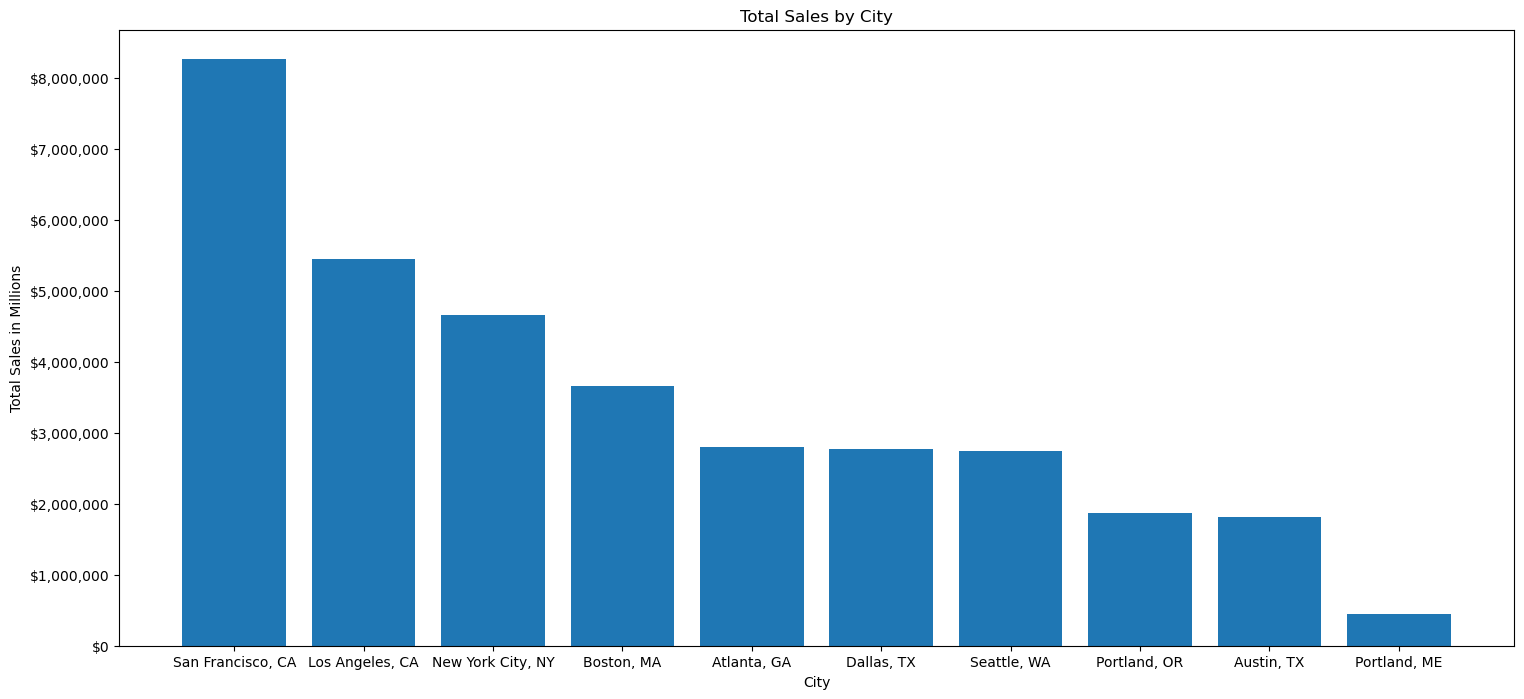

In [321]:
import matplotlib.ticker as mtick

cities = all_data2.groupby('City_State')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(18,8))
plt.bar(cities.index, cities.values)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Formats the y axis
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales in Millions')
plt.show()

The city with the most sales is San Francisco with $8,262,203.91

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [351]:
# Create time variable
all_data2['Purchase_Hour'] = all_data2['Order Date'].dt.strftime('%I %p') #Convert military time to 12 hour AM/PM format
all_data2['Purchase_Hour(24)'] = all_data2['Order Date'].dt.hour
all_data2['Purchase_Minute'] = all_data2['Order Date'].dt.minute
all_data2.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,State,City_State,Time,Purchase_Hour,Purchase_Minute,Purchase_Hour(24)
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,"Dallas, TX",8,08 AM,46,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,"Boston, MA",22,10 PM,30,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,"Los Angeles, CA",14,02 PM,38,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",14,02 PM,38,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",9,09 AM,27,9


In [338]:
# Examine sales by hour
all_data2.groupby('Purchase_Hour')['Total Sales'].sum().sort_values(ascending = False)

Purchase_Hour
07 PM    2412938.54
12 PM    2316821.34
11 AM    2300610.24
08 PM    2281716.24
06 PM    2219348.30
01 PM    2155389.80
05 PM    2129361.61
02 PM    2083672.73
09 PM    2042000.86
10 AM    1944286.77
03 PM    1941549.60
04 PM    1904601.31
09 AM    1639030.58
10 PM    1607549.21
08 AM    1192348.97
11 PM    1179304.44
07 AM     744854.12
12 AM     713721.27
01 AM     460866.88
06 AM     448113.00
02 AM     234851.44
05 AM     230679.82
04 AM     162661.01
03 AM     145757.89
Name: Total Sales, dtype: float64

Advertisements should be displayed in the early afternoon and early evening to maximize purchasing. The times with the most sales are 7pm, 12pm, 11am, and 8pm.

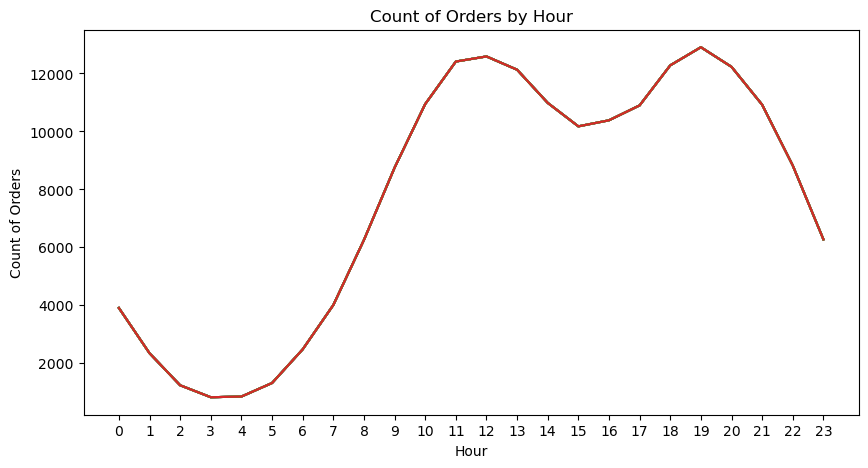

In [365]:
# Graph
hours = [hour for hour, df in all_data2.groupby('Purchase_Hour(24)')]
plt.figure(figsize=(10,5))
plt.plot(hours, all_data2.groupby(['Purchase_Hour(24)']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Count of Orders')
plt.title('Count of Orders by Hour')
plt.show()

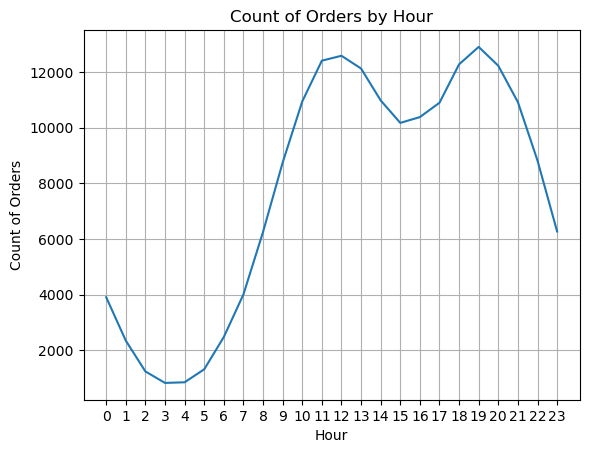

In [389]:
# Another way
# This counts the number of rows based on purchase hour. Gives the total number of orders by hour
test = all_data2.groupby(['Purchase_Hour(24)']).size()
plt.plot(test.index, test.values)
plt.xticks(test.index)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Count of Orders')
plt.title('Count of Orders by Hour')
plt.show()

### Question 4: What products are most often sold together?

In [436]:
#Create a new dataframe and keeps only duplicate orders
df = all_data2[all_data2['Order ID'].duplicated(keep=False)].copy()

#Create a new column that combines Products ordered with same order ID
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,State,City_State,Time,Purchase_Hour,Purchase_Minute,Purchase_Hour(24),Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,"Los Angeles, CA",14,02 PM,38,14,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",14,02 PM,38,14,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,"Los Angeles, CA",19,07 PM,42,19,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA,"Los Angeles, CA",19,07 PM,42,19,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,"Boston, MA",11,11 AM,31,11,"Bose SoundSport Headphones, Bose SoundSport He..."


In [438]:
# Drop duplicates
df = df[['Order ID', 'Grouped']].drop_duplicates().copy()

df.head()

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [444]:
from itertools import combinations
from collections import Counter

#Initializes an empty counter to track pairs
count = Counter()

# Loop through each order, Create all 2-item pairs from the list, and count
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 120),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]

The most common combination of products are the iphone and charging cable.

### Question 5: What product sold the most?

In [511]:
total_quantity_per_product = all_data2.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
print(total_quantity_per_product)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32


The product with the most orders is the AAA Batteries

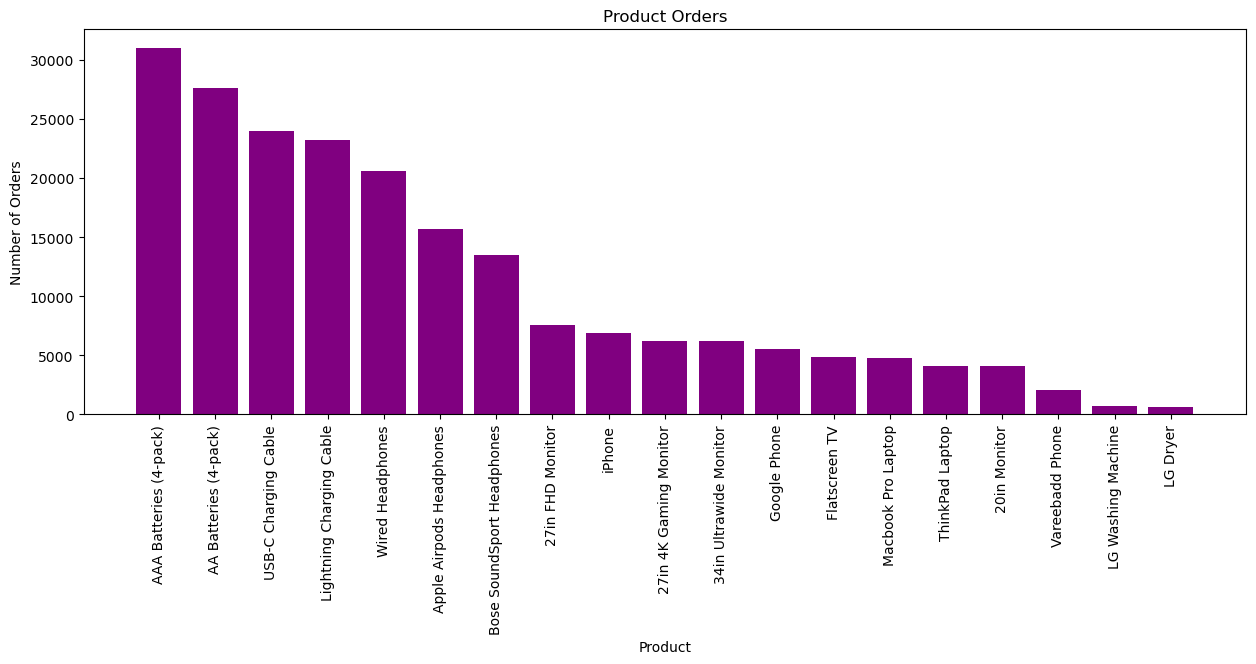

In [514]:
# Graph
plt.figure(figsize=(15,5))
plt.bar(total_quantity_per_product.index, total_quantity_per_product.values, color='purple')
plt.xticks(rotation=90)
plt.title('Product Orders')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.show()

In [524]:
# Overlay prices over product graph
prices = all_data2.groupby('Product')['Price Each'].mean()
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


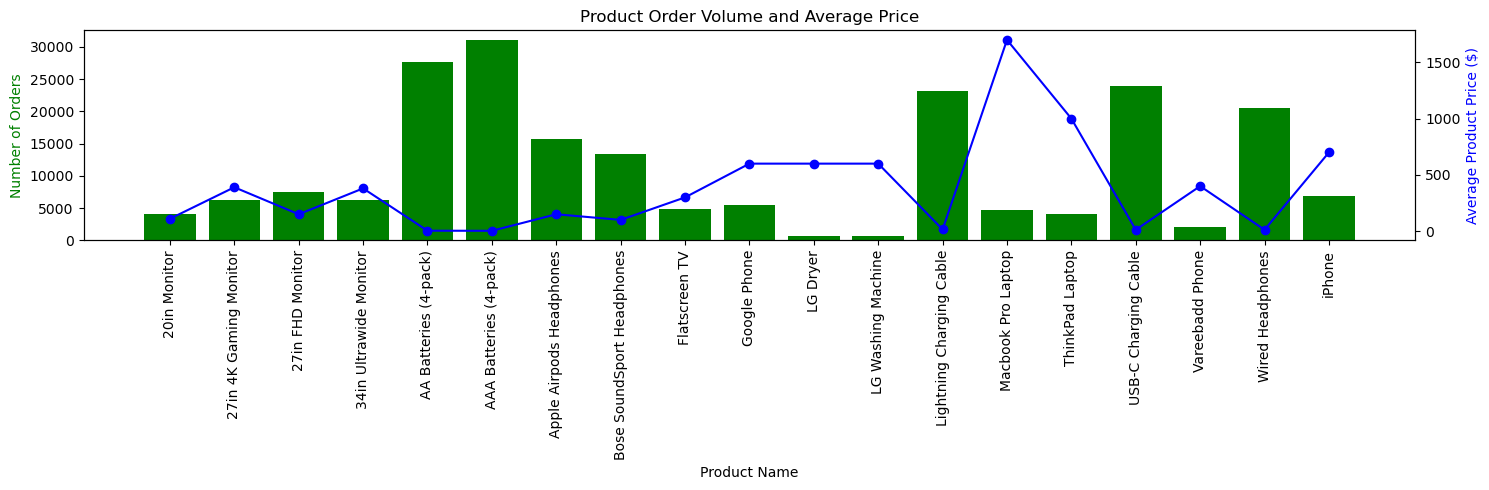

In [544]:
# Ensure both Series are aligned by Product
products = total_quantity_per_product.sort_index()
prices = all_data2.groupby('Product')['Price Each'].mean().sort_index()

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(15, 5))

# Bar plot for quantity
ax1.bar(products.index, products.values, color='green')
ax1.set_ylabel('Number of Orders', color='green')
ax1.set_xlabel('Product Name')

# Line plot for price
ax2 = ax1.twinx()
ax2.plot(products.index, prices.values, color='blue', marker='o')
ax2.set_ylabel('Average Product Price ($)', color='blue')

# X-axis formatting
ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products.index, rotation=90, fontsize=10)

plt.title('Product Order Volume and Average Price')
plt.tight_layout()
plt.show()
